# Load dataset

In [2]:
import pandas as pd

dataset = pd.read_excel("datasets/AJGT.xlsx")
dataset.head()

,ID,Feed,Sentiment
0,1,اربد فيها جامعات اكثر من عمان ... وفيها قد عم...,Positive
1,2,الحلو انكم بتحكوا على اساس انو الاردن ما فيه ...,Negative
2,3,كله رائع بجد ربنا يكرمك,Positive
3,4,لسانك قذر يا قمامه,Negative
4,5,​انا داشره وغير متزوجه ولدي علاقات مشبوه واحشش...,Negative


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1800 non-null   int64 
 1   Feed       1800 non-null   object
 2   Sentiment  1800 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.3+ KB


In [5]:
dataset['Sentiment'].value_counts()

Negative    900
Positive    900
Name: Sentiment, dtype: int64

# Define the train and test datasets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset["Feed"], dataset['Sentiment'], test_size=.2, random_state=100 )

In [8]:
len(X_train)

1440

In [9]:
len(X_test)

360

# Random Forest Classifier

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from pipeline import TextPreProcessing, NlpPipeline
from sklearn.ensemble import RandomForestClassifier

random_forest_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Random forest classifier', RandomForestClassifier())
])

random_forest_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Random forest classifier', RandomForestClassifier())])

In [16]:
from sklearn.metrics import accuracy_score

rf_test_predictions =  random_forest_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, rf_test_predictions):.2f}")

Train accuracy score is 0.82


[[152  24]
 [ 40 144]]


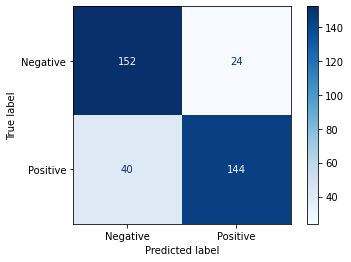

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = plot_confusion_matrix(random_forest_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
print(conf_matrix.confusion_matrix)
plt.show()

In [19]:
import pickle

pickle.dump(random_forest_model, open('models/sentimentRFC.pkl', 'wb'))

# Support Vector Machine

In [20]:
from sklearn.svm import SVC

SVC_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Support Vector Machine', SVC())
])

SVC_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Support Vector Machine', SVC())])

In [21]:
SVC_test_predictions =  SVC_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, SVC_test_predictions):.2f}")

Train accuracy score is 0.86


[[160  16]
 [ 34 150]]


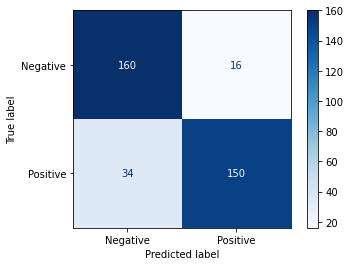

In [22]:
conf_matrix = plot_confusion_matrix(SVC_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [23]:
import pickle

pickle.dump(SVC_model, open('models/sentimentSVC.pkl', 'wb'))

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = Pipeline([
    ('pre-processing', TextPreProcessing()),
    ('nlp', NlpPipeline()),
    ('TF-IDF',TfidfVectorizer()),
    ('Logistic Regression', LogisticRegression())
])

logistic_regression_model.fit(X_train, Y_train)

Pipeline(steps=[('pre-processing', TextPreProcessing()), ('nlp', NlpPipeline()),
                ('TF-IDF', TfidfVectorizer()),
                ('Logistic Regression', LogisticRegression())])

In [30]:
LR_test_predictions =  logistic_regression_model.predict(X_test)
print(f"Train accuracy score is {accuracy_score(Y_test, LR_test_predictions):.2f}")

Train accuracy score is 0.86


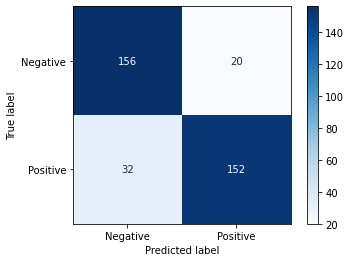

In [31]:
conf_matrix = plot_confusion_matrix(logistic_regression_model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
plt.show()

In [28]:
import pickle

pickle.dump(logistic_regression_model, open('models/sentimentLR.pkl', 'wb'))